# Relations

In this notebook we will be looking at some permuations of independent variables, with a constant dependent variable 
of *distance* of some Messier object. The important results will be the linear regression which analyzes *magnitude* from *distance*; but the other relations
are otherwise interesting.

In [31]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
messiers = pd.read_csv('Messier Catalog List - Sheet1.csv')
# for ease of access
messiers['DIST'] = messiers['DIST (ly)']
messiers['DIST'] = messiers.apply(lambda row: int(row.DIST.replace(',', '')), axis=1)
messiers

,M,NGC,TYPE,CONS,RA,DEC,MAG,SIZE,DIST (ly),VIEWING SEASON,VIEWING DIFFICULTY,DIST
0,M1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,5h 34.5m,22°1,8.4,6.0x4.0,"6,300",Winter,Moderate,6300
1,M2,NGC 7089,Globular Cluster,Aquarius,21h 33.5m,-0°49,6.5,12.9,"37,500",Autumn,Easy,37500
2,M3,NGC 5272,Globular Cluster,Canes Venatici,13h 42.2m,28°23,6.2,16.2,"33,900",Spring,Easy,33900
3,M4,NGC 6121,Globular Cluster,Scorpius,16h 23.6m,-26°32,5.6,26.3,"7,200",Summer,Hard,7200
4,M5,NGC 5904,Globular Cluster,Serpens Caput,15h 18.6m,2°5,5.6,17.4,"24,500",Summer,Very Easy,24500
...,...,...,...,...,...,...,...,...,...,...,...,...
105,M106,NGC 4258,Spiral Galaxy,Canes Venatici,12h 19m,47°18,8.4,19x8,"25,000,000",Spring,Hard,25000000
106,M107,NGC 6171,Globular Cluster,Ophiucus,16h 32.5m,-13°3,7.9,10,"19,600",Summer,Hard,19600
107,M108,NGC 3556,Spiral Galaxy,Ursa Major,11h 11.5m,55°40,10.0,8x1,"45,000,000",Spring,Hard,45000000
108,M109,NGC 3992,Spiral Galaxy,Ursa Major,11h 57.6m,53°23,9.8,7x4,"55,000,000",Spring,Hard,55000000


## Magnitude from distance

This is the important result, and we will obtain this using the `smf.ols` function, which provides a linear regression model based upon the date.

In [33]:
ols_dist = smf.ols('MAG ~ DIST', data=messiers).fit()
ols_dist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAG   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     70.37
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.06e-13
Time:                        23:36:27   Log-Likelihood:                -187.78
No. Observations:                 110   AIC:                             379.6
Df Residuals:                     108   BIC:                             385.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8320      0.153     44.766      0.000       6.529       7.134
DIST        4.645e-08   5.54e-09      8.388      0.000    3.55e-08    5.74e-08
==============================================================================
Omnibus:                       13.602   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.014
Skew:                          -0.591   Prob(JB):                     4.51e-05
Kurtosis:                       4.723   Cond. No.                     3.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

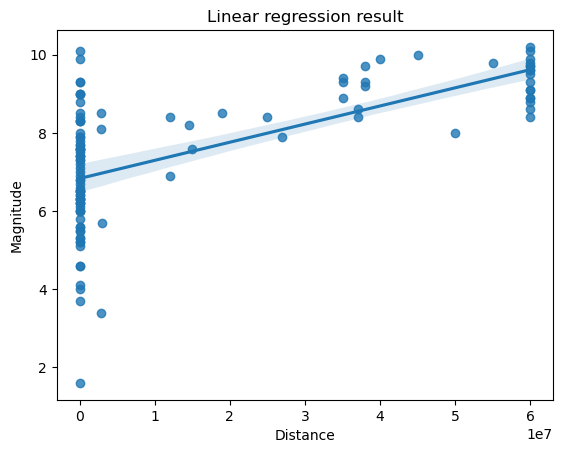

In [36]:
sns.regplot(x='DIST', y='MAG', data=messiers)
plt.title('Linear regression result')
plt.ylabel('Magnitude')
plt.xlabel('Distance');

### Evaluating the magnitude from the distance

Given the above results (summarized below):

```
OLS Regression Results
Dep. Variable:	MAG	R-squared:	0.395
Model:	OLS	Adj. R-squared:	0.389
Method:	Least Squares	F-statistic:	70.37
Date:	Mon, 04 Dec 2023	Prob (F-statistic):	2.06e-13
Time:	23:36:27	Log-Likelihood:	-187.78
No. Observations:	110	AIC:	379.6
Df Residuals:	108	BIC:	385.0
Df Model:	1		
Covariance Type:	nonrobust		
coef	std err	t	P>|t|	[0.025	0.975]
Intercept	6.8320	0.153	44.766	0.000	6.529	7.134
DIST	4.645e-08	5.54e-09	8.388	0.000	3.55e-08	5.74e-08
Omnibus:	13.602	Durbin-Watson:	1.509
Prob(Omnibus):	0.001	Jarque-Bera (JB):	20.014
Skew:	-0.591	Prob(JB):	4.51e-05
Kurtosis:	4.723	Cond. No.	3.28e+07
```

It seems that we have a really interesting result: *distance is in fact significant for explaining magnitude*.

## Right ascension

Now that we have our important result, let us look at other interesting features. First, let us inspect right ascension, and how it relates to magnitude.

In [45]:
'16h 32.5m'.split('h')

['16', ' 32.5m']

In [53]:
def ra_str_to_float(ra: str) -> float:
    '''
    Converts a right ascension string to a float
    '''
    hsms = ra.split('h')
    h = float(hsms[0])
    m = float(hsms[1].strip().split('m')[0])
    return h + m / 60

messiers['CONVERTED_RA'] = messiers.apply(lambda row: ra_str_to_float(row.RA), axis=1)
messiers.head()


,M,NGC,TYPE,CONS,RA,DEC,MAG,SIZE,DIST (ly),VIEWING SEASON,VIEWING DIFFICULTY,DIST,CONVERTED_RA
0,M1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,5h 34.5m,22°1,8.4,6.0x4.0,"6,300",Winter,Moderate,6300,5.575000
1,M2,NGC 7089,Globular Cluster,Aquarius,21h 33.5m,-0°49,6.5,12.9,"37,500",Autumn,Easy,37500,21.558333
2,M3,NGC 5272,Globular Cluster,Canes Venatici,13h 42.2m,28°23,6.2,16.2,"33,900",Spring,Easy,33900,13.703333
3,M4,NGC 6121,Globular Cluster,Scorpius,16h 23.6m,-26°32,5.6,26.3,"7,200",Summer,Hard,7200,16.393333
4,M5,NGC 5904,Globular Cluster,Serpens Caput,15h 18.6m,2°5,5.6,17.4,"24,500",Summer,Very Easy,24500,15.310000


In [54]:
ols_ra = smf.ols('MAG ~ CONVERTED_RA', data=messiers).fit()
ols_ra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAG   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.03721
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.847
Time:                        23:49:56   Log-Likelihood:                -215.35
No. Observations:                 110   AIC:                             434.7
Df Residuals:                     108   BIC:                             440.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.4517      0.412     18.092      0.000       6.635       8.268
CONVERTED_RA     0.0056      0.029      0.193      0.847      -0.052       0.063
==============================================================================
Omnibus:                        6.643   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.461
Skew:                          -0.591   Prob(JB):                       0.0395
Kurtosis:                       3.110   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Right ascension')

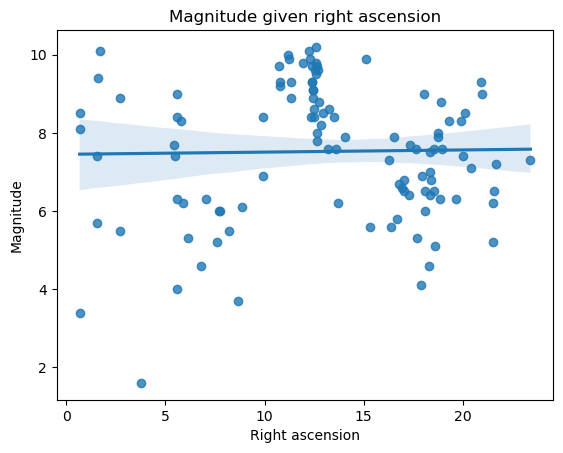

In [55]:
sns.regplot(x='CONVERTED_RA', y='MAG', data=messiers)
plt.title('Magnitude given right ascension')
plt.ylabel('Magnitude')
plt.xlabel('Right ascension')

### Results

Not very significant results; but this is fun and important. The null result is still true.

## Declination

We probably would expect declination to give similar results, but just to test it, let's run it to see if we get something similar.

In [62]:
def dec_str_to_float(dec: str) -> float:
    '''
    Converts declination to float
    '''
    degrees, minutes = tuple(float(x) for x in dec.split('°'))
    return degrees + minutes / 60

messiers['CONVERTED_DEC'] = messiers.apply(lambda row: dec_str_to_float(row.DEC), axis=1)
messiers

,M,NGC,TYPE,CONS,RA,DEC,MAG,SIZE,DIST (ly),VIEWING SEASON,VIEWING DIFFICULTY,DIST,CONVERTED_RA,CONVERTED_DEC
0,M1,NGC 1952 Crab Nebula,Supernova Remnant,Taurus,5h 34.5m,22°1,8.4,6.0x4.0,"6,300",Winter,Moderate,6300,5.575000,22.016667
1,M2,NGC 7089,Globular Cluster,Aquarius,21h 33.5m,-0°49,6.5,12.9,"37,500",Autumn,Easy,37500,21.558333,0.816667
2,M3,NGC 5272,Globular Cluster,Canes Venatici,13h 42.2m,28°23,6.2,16.2,"33,900",Spring,Easy,33900,13.703333,28.383333
3,M4,NGC 6121,Globular Cluster,Scorpius,16h 23.6m,-26°32,5.6,26.3,"7,200",Summer,Hard,7200,16.393333,-25.466667
4,M5,NGC 5904,Globular Cluster,Serpens Caput,15h 18.6m,2°5,5.6,17.4,"24,500",Summer,Very Easy,24500,15.310000,2.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,M106,NGC 4258,Spiral Galaxy,Canes Venatici,12h 19m,47°18,8.4,19x8,"25,000,000",Spring,Hard,25000000,12.316667,47.300000
106,M107,NGC 6171,Globular Cluster,Ophiucus,16h 32.5m,-13°3,7.9,10,"19,600",Summer,Hard,19600,16.541667,-12.950000
107,M108,NGC 3556,Spiral Galaxy,Ursa Major,11h 11.5m,55°40,10.0,8x1,"45,000,000",Spring,Hard,45000000,11.191667,55.666667
108,M109,NGC 3992,Spiral Galaxy,Ursa Major,11h 57.6m,53°23,9.8,7x4,"55,000,000",Spring,Hard,55000000,11.960000,53.383333


In [63]:
ols_dec = smf.ols('MAG ~ CONVERTED_DEC', data=messiers).fit()
ols_dec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAG   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.722
Date:                Mon, 04 Dec 2023   Prob (F-statistic):             0.0108
Time:                        23:52:31   Log-Likelihood:                -212.05
No. Observations:                 110   AIC:                             428.1
Df Residuals:                     108   BIC:                             433.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.3781      0.170     43.473      0.000       7.042       7.715
CONVERTED_DEC     0.0151      0.006      2.593      0.011       0.004       0.027
==============================================================================
Omnibus:                       13.202   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.078
Skew:                          -0.803   Prob(JB):                     0.000877
Kurtosis:                       3.703   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Declination')

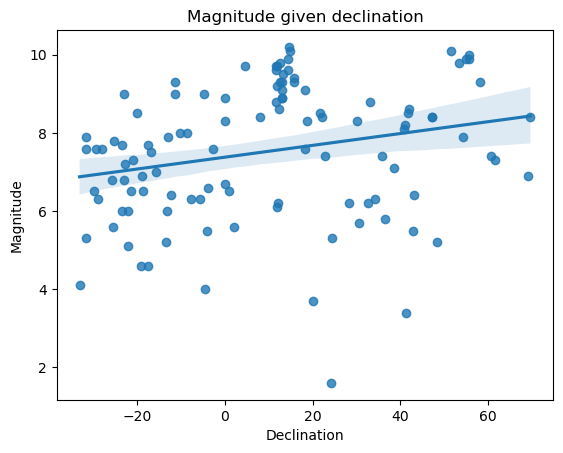

In [64]:
sns.regplot(x='CONVERTED_DEC', y='MAG', data=messiers)
plt.title('Magnitude given declination')
plt.ylabel('Magnitude')
plt.xlabel('Declination')

### Discussion

This model seems to be a little bit better, but clearly from the graph we can determine that it is still not too good.

## Permutations

In order to create the *best model*, let us engage in some permutations of the data! Maybe we might reveal something interesting.

In [65]:
ols_dist_dec = smf.ols('MAG ~ DIST + CONVERTED_DEC', data=messiers).fit()
ols_dist_dec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAG   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     36.66
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.47e-13
Time:                        23:55:48   Log-Likelihood:                -186.66
No. Observations:                 110   AIC:                             379.3
Df Residuals:                     107   BIC:                             387.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.7904      0.154     43.989      0.000       6.484       7.096
DIST           4.466e-08   5.64e-09      7.922      0.000    3.35e-08    5.58e-08
CONVERTED_DEC     0.0070      0.005      1.478      0.142      -0.002       0.016
==============================================================================
Omnibus:                       17.719   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.358
Skew:                          -0.728   Prob(JB):                     6.95e-07
Kurtosis:                       5.017   Cond. No.                     3.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
ols_dist_ra = smf.ols('MAG ~ DIST + CONVERTED_RA', data=messiers).fit()
ols_dist_ra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAG   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     36.78
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           6.96e-13
Time:                        23:57:46   Log-Likelihood:                -186.59
No. Observations:                 110   AIC:                             379.2
Df Residuals:                     107   BIC:                             387.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.3625      0.343     18.549      0.000       5.682       7.042
DIST          4.771e-08   5.57e-09      8.573      0.000    3.67e-08    5.87e-08
CONVERTED_RA     0.0346      0.023      1.526      0.130      -0.010       0.079
==============================================================================
Omnibus:                        7.956   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.848
Skew:                          -0.345   Prob(JB):                      0.00441
Kurtosis:                       4.375   Cond. No.                     7.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""